# Impatti dell'alcol sui giovani e Analisi predittiva sul voto finale

In [1]:
#import library 

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import Dataset

In [81]:
por = pd.read_csv('dataset/dataset/student-por.csv')

In [80]:
por.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

In [82]:
por.shape

(649, 33)

In [5]:
len(por[por.duplicated()])

0

In [6]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Trasformo le varibili categoriche in variabili numeriche tramite le classi OneHotEncoder e LabelEncoder

In [78]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,17,1,0,1,1,1,1,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,15,1,1,1,1,1,1,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,15,1,0,1,4,2,1,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,16,1,0,1,3,3,1,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
label_encoders = {}
onehot_encoders = {}
mapping = {}  # LabelEncoder mapping dictionary

In [8]:
categorical_columns = por.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if por.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)

In [9]:
# Encoding non-binary variables with OneHotEncoder and updating the mapping
for col in categorical_not_binary_columns:
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    encoded_values = onehot_encoders[col].fit_transform(por[[col]])
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    por = pd.concat([por, encoded_df], axis=1)
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}

    por.drop(columns=[col], inplace=True)

In [10]:
# Encoding binary variables with LabelEncoder and updating the mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    por[col] = label_encoders[col].fit_transform(por[col])
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}

In [11]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             649 non-null    int64  
 1   sex                649 non-null    int64  
 2   age                649 non-null    int64  
 3   address            649 non-null    int64  
 4   famsize            649 non-null    int64  
 5   Pstatus            649 non-null    int64  
 6   Medu               649 non-null    int64  
 7   Fedu               649 non-null    int64  
 8   traveltime         649 non-null    int64  
 9   studytime          649 non-null    int64  
 10  failures           649 non-null    int64  
 11  schoolsup          649 non-null    int64  
 12  famsup             649 non-null    int64  
 13  paid               649 non-null    int64  
 14  activities         649 non-null    int64  
 15  nursery            649 non-null    int64  
 16  higher             649 non

Durante questa analisi andremo a vedere:

- quando si beve di più: durante il weekend o durante la settimana

In [12]:
alc_cons = por[['Dalc', 'Walc']].copy()
alc_cons['GAP'] = alc_cons.Walc - alc_cons.Dalc

In [13]:
print('alc_cons.Dalc.mean()', round(alc_cons.Dalc.mean(), 2))
print('alc_cons.Walc.mean()', round(alc_cons.Walc.mean(), 2))

alc_cons.Dalc.mean() 1.5
alc_cons.Walc.mean() 2.28


In [14]:
# Creare l'istogramma con Plotly
fig = go.Figure()

# Aggiungere l'istogramma
fig.add_trace(go.Histogram(
    x=alc_cons['GAP'],
    nbinsx=9,
    marker_color='#A054B7',
    opacity=0.75
))

# Aggiungere titolo e etichette degli assi
fig.update_layout(
    title='Distribuzione del Gap tra il Consumo di Alcol nel Weekend e durante la Settimana',
    xaxis_title='Gap (Walc - Dalc)',
    yaxis_title='Frequenza',
    bargap=0.0,
    template='simple_white'
)

# Mostrare il grafico
fig.show()


In [15]:
alc_cons.groupby('GAP')['GAP'].count()

GAP
-4      1
-3      2
-2      2
-1      8
 0    304
 1    182
 2    110
 3     35
 4      5
Name: GAP, dtype: int64

<b>Prendiamo in considerazione i valori di correlazione di Walc e Dalc con le altre feature</b>

In [16]:
# Calcolare la matrice di correlazione
correlation_matrix = por.corr()

# Estrarre le correlazioni di 'Dalc' e 'Walc'
dalc_corr = correlation_matrix['Dalc'].drop(['Dalc', 'Walc'])
walc_corr = correlation_matrix['Walc'].drop(['Dalc', 'Walc'])


In [17]:
# Estrarre i valori assoluti delle correlazioni di 'Dalc'
abs_dalc_corr = dalc_corr.abs()
# Ordinare i valori in modo discendente
abs_dalc_corr_sort = abs_dalc_corr.sort_values(ascending=False)

# Estrarre i valori assoluti delle correlazioni di 'Walc'
abs_walc_corr = walc_corr.abs()
# Ordinare i valori in modo discendente
abs_walc_corr_sort = abs_walc_corr.sort_values(ascending=False)

In [18]:
abs_dalc_corr_sort.index

Index(['sex', 'goout', 'G3', 'G1', 'G2', 'absences', 'studytime', 'age',
       'higher', 'reason_other', 'guardian_other', 'freetime', 'failures',
       'guardian_mother', 'traveltime', 'reason_reputation', 'Fjob_services',
       'nursery', 'Mjob_health', 'famrel', 'romantic', 'famsize',
       'reason_home', 'health', 'Mjob_services', 'paid', 'Fjob_other',
       'reason_course', 'address', 'school', 'internet', 'Pstatus',
       'guardian_father', 'Fjob_at_home', 'schoolsup', 'Mjob_teacher',
       'activities', 'Fjob_teacher', 'Mjob_other', 'famsup', 'Medu',
       'Fjob_health', 'Mjob_at_home', 'Fedu'],
      dtype='object')

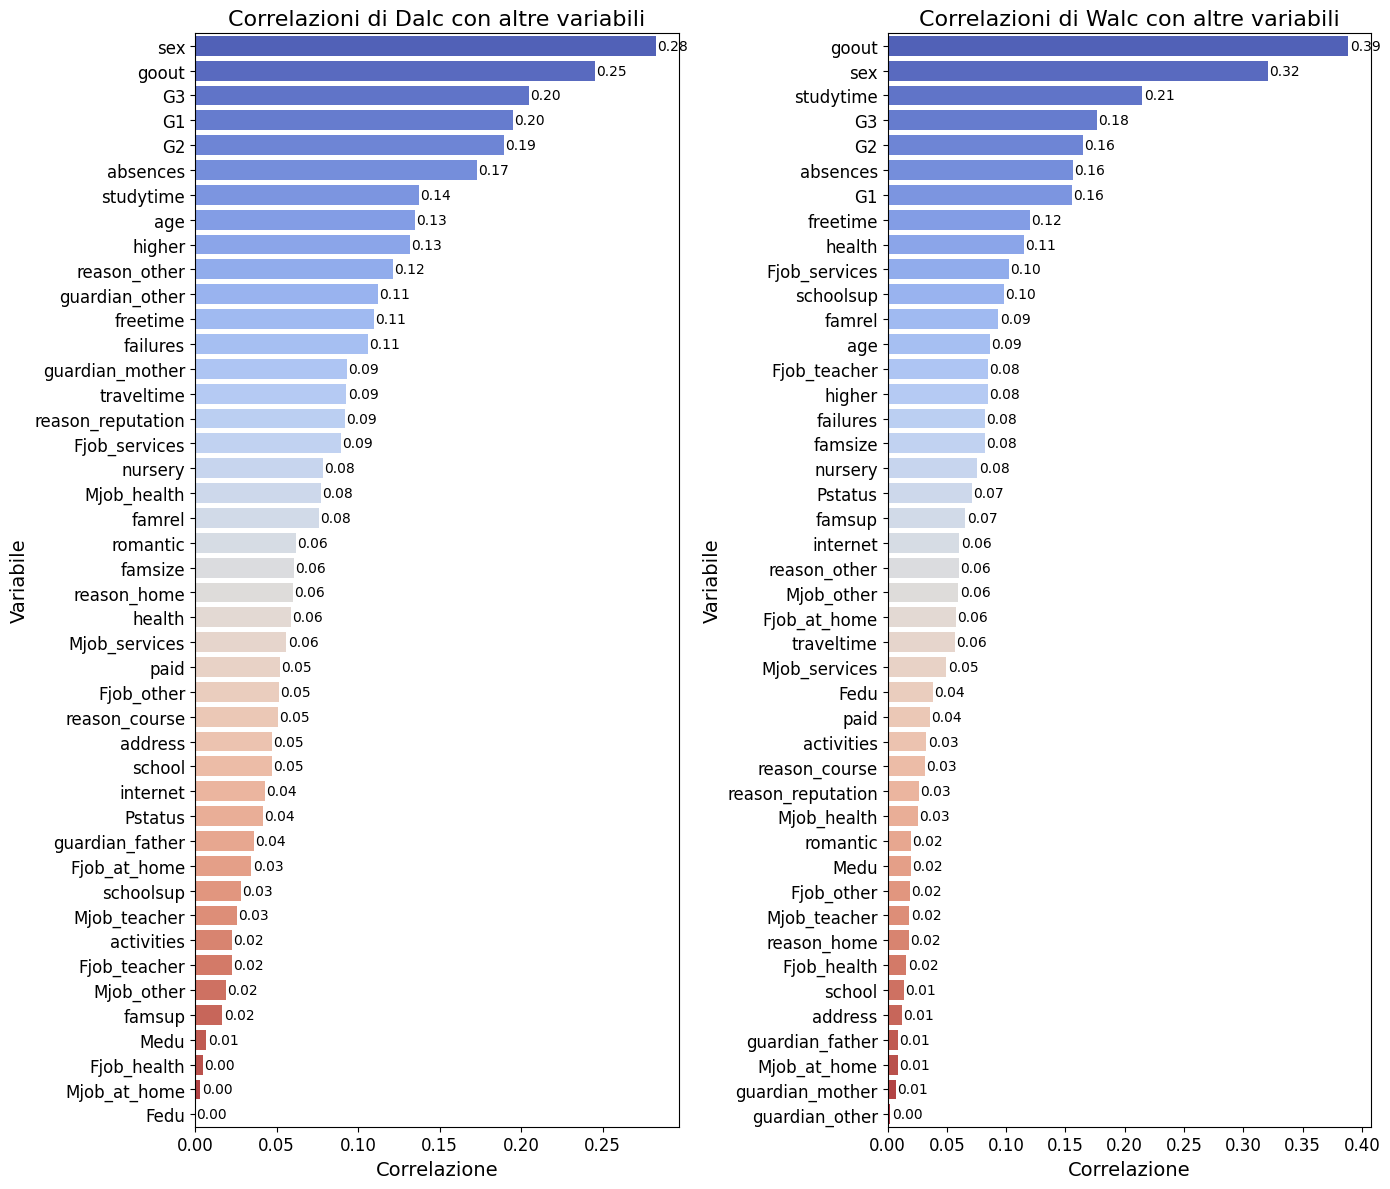

In [19]:
# Settaggi per aumentare la dimensione del font
font_title = {'size': 16}
font_labels = {'size': 14}

# Creare un grafico a barre per le correlazioni di 'Dalc'
plt.figure(figsize=(14, 12))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=abs_dalc_corr_sort.index, x=abs_dalc_corr_sort, palette='coolwarm', hue=abs_dalc_corr_sort.index, dodge=False)
plt.title('Correlazioni di Dalc con altre variabili', fontdict=font_title)
plt.xlabel('Correlazione', fontdict=font_labels)
plt.ylabel('Variabile', fontdict=font_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungere i valori di correlazione sopra le barre
for p in ax1.patches:
    ax1.annotate(format(p.get_width(), '.2f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (12, 0), 
                  textcoords = 'offset points')

# Creare il secondo subplot per le correlazioni di 'Walc'
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=abs_walc_corr_sort.index, x=abs_walc_corr_sort, palette='coolwarm', hue=abs_walc_corr_sort.index, dodge=False)
plt.title('Correlazioni di Walc con altre variabili', fontdict=font_title)
plt.xlabel('Correlazione', fontdict=font_labels)
plt.ylabel('Variabile', fontdict=font_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungere i valori di correlazione sopra le barre
for p in ax2.patches:
    ax2.annotate(format(p.get_width(), '.2f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (12, 0), 
                  textcoords = 'offset points')

plt.tight_layout()
plt.show()

Notiamo che le maggiori correlazioni sono con le seguenti variabili (valore di correlazione > 0.2):
 - sex
 - goout
 - studytime
 - G3

<b>Sex</b>

Percentuali di donne che bevono durante il weekend, 
Percentuali di donne che bevono durnte il fine settimana,
Percentuali di uomini che bevono durante il weekend, 
Percentuali di uomini che bevono durnte il fine settimana

In [ ]:
mapping['sex']

In [20]:
por.groupby("sex")[['Dalc', 'Walc']].mean()

,Dalc,Walc
sex,,
0,1.284595,1.937337
1,1.815789,2.774436


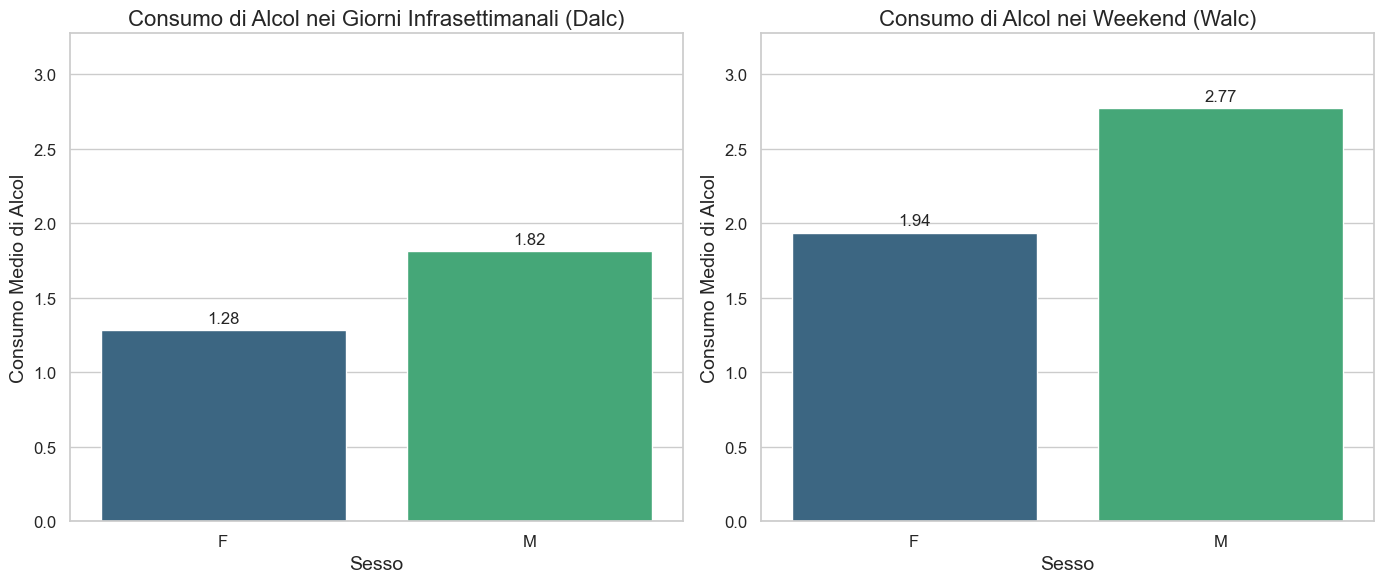

In [23]:
# Calcolare le medie di Dalc e Walc per sesso
mean_alc_cons = por.groupby("sex")[['Dalc', 'Walc']].mean().reset_index()

# Rinominare i valori di 'sex' per una visualizzazione più chiara
mean_alc_cons['sex'] = mean_alc_cons['sex'].replace(mapping['sex'])

# Trovare il valore massimo tra Dalc e Walc per impostare la stessa scala per l'asse y
max_value = max(mean_alc_cons[['Dalc', 'Walc']].max()) + 0.5

# Impostare lo stile per il grafico
sns.set_theme(style="whitegrid")

# Creare il grafico a barre
plt.figure(figsize=(14, 6))

# Dalc - consumo di alcol nei giorni infrasettimanali
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='sex', y='Dalc', data=mean_alc_cons, palette='viridis', hue='sex', dodge=False, legend=False, ax=ax1)
plt.title('Consumo di Alcol nei Giorni Infrasettimanali (Dalc)', fontsize=16)
plt.xlabel('Sesso', fontsize=14)
plt.ylabel('Consumo Medio di Alcol', fontsize=14)
plt.ylim(0, max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotare i valori sopra le barre per Dalc
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', fontsize=12, padding=3)



# Walc - consumo di alcol nei weekend
ax2 = plt.subplot(1, 2, 2)
sns.barplot(x='sex', y='Walc', data=mean_alc_cons, palette='viridis', hue='sex', dodge=False, legend=False, ax=ax2)
plt.title('Consumo di Alcol nei Weekend (Walc)', fontsize=16)
plt.xlabel('Sesso', fontsize=14)
plt.ylabel('Consumo Medio di Alcol', fontsize=14)
plt.ylim(0, max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotare i valori sopra le barre per Walc
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f', fontsize=12, padding=3)

plt.tight_layout()
plt.show()


<b>Go out and study time</b>

In [ ]:
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponiamo che 'por' sia il DataFrame con i dati

# Impostare lo stile per i grafici
sns.set_theme(style="whitegrid")

# Creare una figura con sottotrame
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)  # Imposta sharey=True per condividere la scala sull'asse y

# Grafico a barre per goout vs Dalc
sns.barplot(ax=axes[0, 0], x='goout', y='Dalc', data=por, hue='goout', palette='viridis', dodge=False, legend=False, errorbar=None)
#axes[0, 0].set_title('Consumo Medio di Alcol nei Giorni Infrasettimanali (Dalc) per Livello di Uscite (goout)', fontsize=16)
axes[0, 0].set_xlabel('Livello di Uscite (goout)', fontsize=14)
axes[0, 0].set_ylabel('Consumo Medio di Alcol (Dalc)', fontsize=14)

# Annotare i valori sopra le barre per goout vs Dalc
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per goout vs Walc
sns.barplot(ax=axes[0, 1], x='goout', y='Walc', data=por, hue='goout', palette='viridis', dodge=False, legend=False, errorbar=None)
#axes[0, 1].set_title('Consumo Medio di Alcol nei Weekend (Walc) per Livello di Uscite (goout)', fontsize=16)
axes[0, 1].set_xlabel('Livello di Uscite (goout)', fontsize=14)
axes[0, 1].set_ylabel('Consumo Medio di Alcol (Walc)', fontsize=14)

# Annotare i valori sopra le barre per goout vs Walc
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per studytime vs Dalc
sns.barplot(ax=axes[1, 0], x='studytime', y='Dalc', data=por, hue='studytime', palette='viridis', dodge=False, legend=False, errorbar=None)
#axes[1, 0].set_title('Consumo Medio di Alcol nei Giorni Infrasettimanali (Dalc) per Tempo di Studio (studytime)', fontsize=16)
axes[1, 0].set_xlabel('Tempo di Studio (studytime)', fontsize=14)
axes[1, 0].set_ylabel('Consumo Medio di Alcol (Dalc)', fontsize=14)

# Annotare i valori sopra le barre per studytime vs Dalc
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per studytime vs Walc
sns.barplot(ax=axes[1, 1], x='studytime', y='Walc', data=por, hue='studytime', palette='viridis', dodge=False, legend=False, errorbar=None)
#axes[1, 1].set_title('Consumo Medio di Alcol nei Weekend (Walc) per Tempo di Studio (studytime)', fontsize=16)
axes[1, 1].set_xlabel('Tempo di Studio (studytime)', fontsize=14)
axes[1, 1].set_ylabel('Consumo Medio di Alcol (Walc)', fontsize=14)

# Annotare i valori sopra le barre per studytime vs Walc
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

plt.tight_layout()
plt.show()
'''

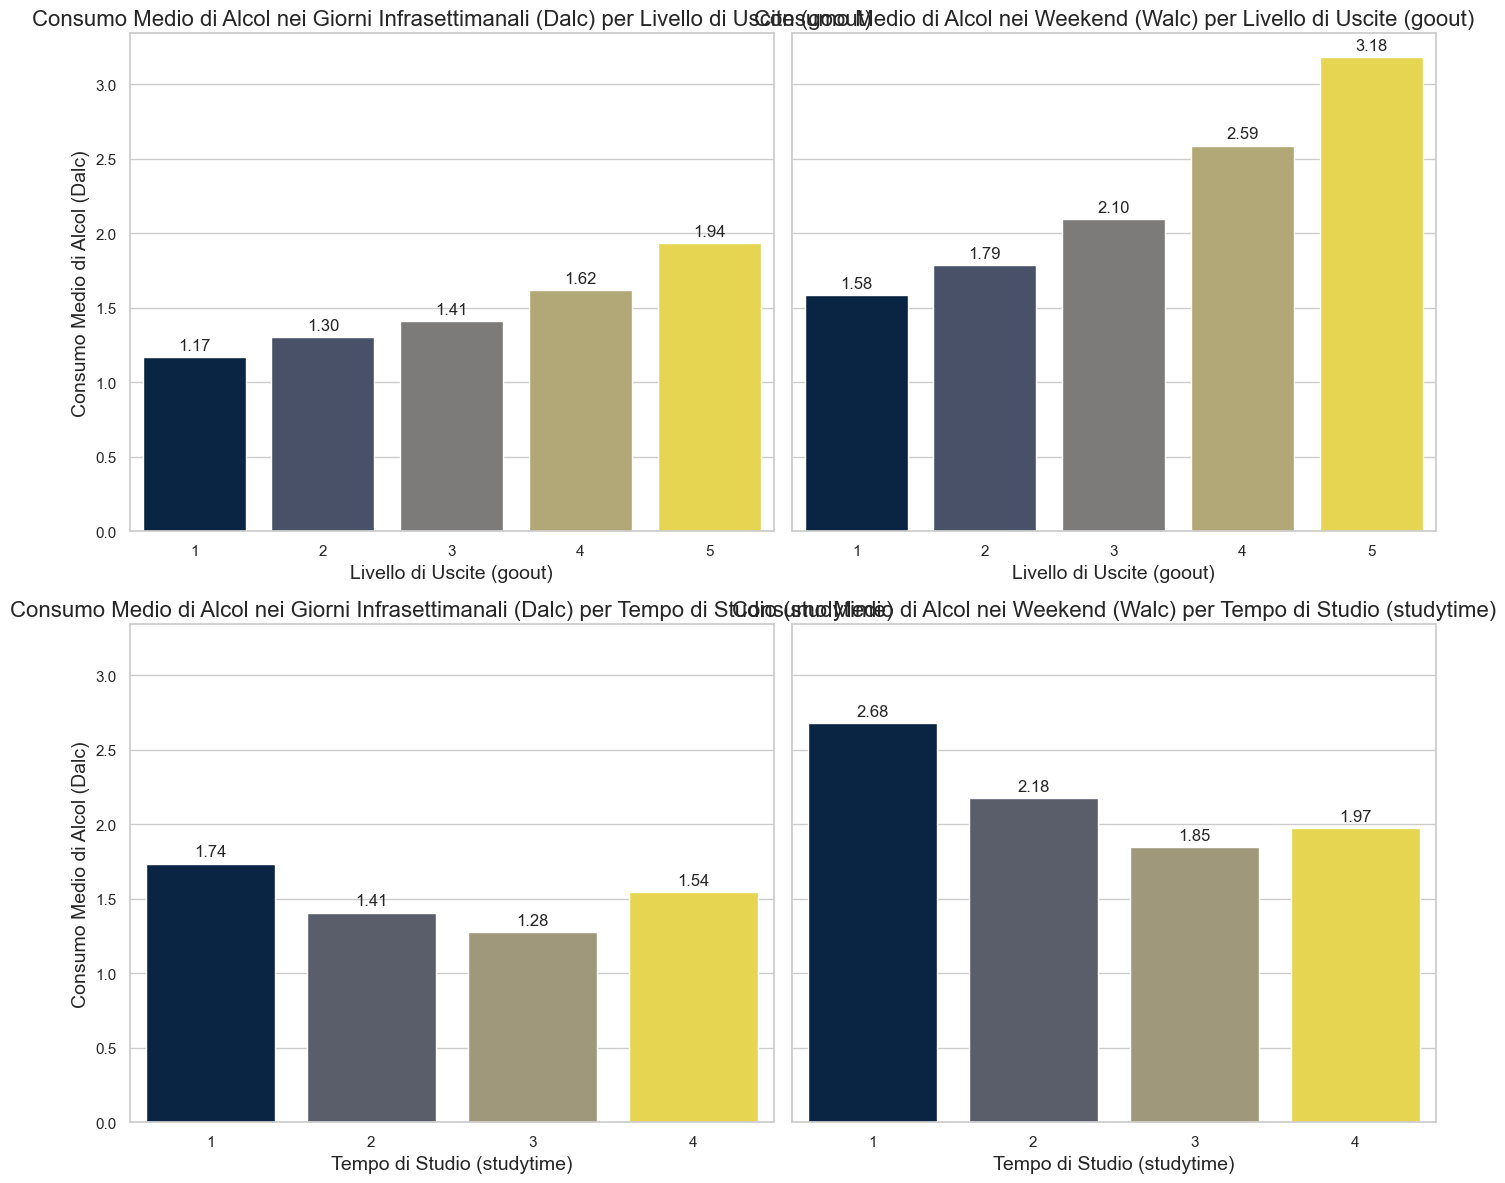

In [24]:

# Impostare lo stile per i grafici
sns.set_theme(style="whitegrid")

# Creare una figura con sottotrame
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)  # Imposta sharey=True per condividere la scala sull'asse y

# Grafico a barre per goout vs Dalc
sns.barplot(ax=axes[0, 0], x='goout', y='Dalc', data=por, hue='goout', palette='cividis', dodge=False, legend=False, errorbar=None)
axes[0, 0].set_title('Consumo Medio di Alcol nei Giorni Infrasettimanali (Dalc) per Livello di Uscite (goout)', fontsize=16)
axes[0, 0].set_xlabel('Livello di Uscite (goout)', fontsize=14)
axes[0, 0].set_ylabel('Consumo Medio di Alcol (Dalc)', fontsize=14)

# Annotare i valori sopra le barre per goout vs Dalc
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per goout vs Walc
sns.barplot(ax=axes[0, 1], x='goout', y='Walc', data=por, hue='goout', palette='cividis', dodge=False, legend=False, errorbar=None)
axes[0, 1].set_title('Consumo Medio di Alcol nei Weekend (Walc) per Livello di Uscite (goout)', fontsize=16)
axes[0, 1].set_xlabel('Livello di Uscite (goout)', fontsize=14)
axes[0, 1].set_ylabel('Consumo Medio di Alcol (Walc)', fontsize=14)

# Annotare i valori sopra le barre per goout vs Walc
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per studytime vs Dalc
sns.barplot(ax=axes[1, 0], x='studytime', y='Dalc', data=por, hue='studytime', palette='cividis', dodge=False, legend=False, errorbar=None)
axes[1, 0].set_title('Consumo Medio di Alcol nei Giorni Infrasettimanali (Dalc) per Tempo di Studio (studytime)', fontsize=16)
axes[1, 0].set_xlabel('Tempo di Studio (studytime)', fontsize=14)
axes[1, 0].set_ylabel('Consumo Medio di Alcol (Dalc)', fontsize=14)

# Annotare i valori sopra le barre per studytime vs Dalc
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

# Grafico a barre per studytime vs Walc
sns.barplot(ax=axes[1, 1], x='studytime', y='Walc', data=por, hue='studytime', palette='cividis', dodge=False, legend=False, errorbar=None)
axes[1, 1].set_title('Consumo Medio di Alcol nei Weekend (Walc) per Tempo di Studio (studytime)', fontsize=16)
axes[1, 1].set_xlabel('Tempo di Studio (studytime)', fontsize=14)
axes[1, 1].set_ylabel('Consumo Medio di Alcol (Walc)', fontsize=14)

# Annotare i valori sopra le barre per studytime vs Walc
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.2f', fontsize=12, padding=3)

plt.tight_layout()
plt.show()


<b>G3</b>

# Previsioni del voto finale tramite algoritmi di machine learnig

### Random Forest

In [26]:
# 1. Separazione delle feature e del target
X = por.drop(columns=['G3'])
y = por['G3']

In [ ]:
# 2. Riduzione della dimensionalità

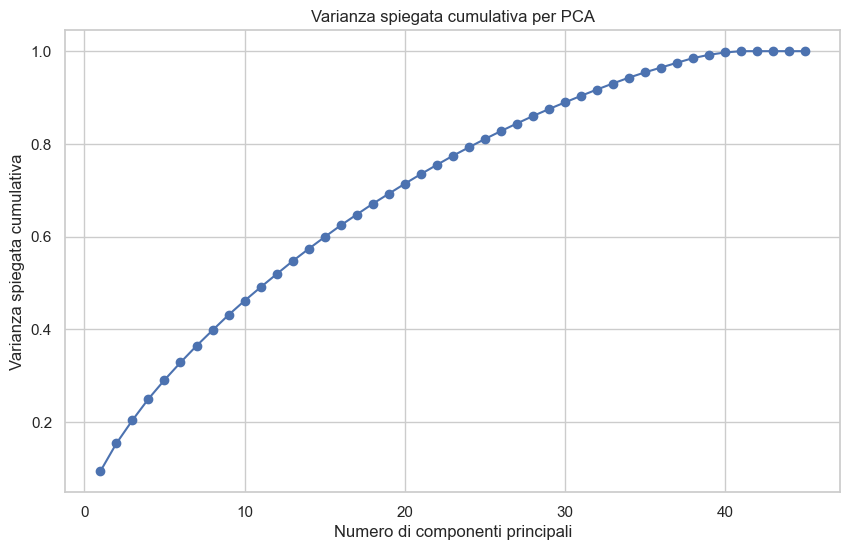

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizzazione dei dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA senza specificare il numero di componenti
pca = PCA()
pca.fit(X_scaled)

# Varianza spiegata cumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot della varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Varianza spiegata cumulativa per PCA')
plt.grid(True)
plt.show()


In [73]:
# Scegliere il numero di componenti che spiegano almeno il 95% della varianza
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Numero di componenti principali per spiegare almeno il 95% della varianza: {num_components}")

# Riduzione della dimensionalità con il numero ottimale di componenti
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Salva i nomi delle colonne originali prima di applicare PCA
col_names = X.columns.tolist()

Numero di componenti principali per spiegare almeno il 95% della varianza: 35


In [36]:
# 3. Divisione del dataset in training e test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [40]:
# 4. Ottimizzazione dei parametri di ogni modello
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform

# Definizione delle distribuzioni dei parametri da ottimizzare per ogni modello
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30]
}

param_dist_svr = {
    'C': uniform(0.1, 100),
    'gamma': uniform(1e-4, 1e-1)
}

param_dist_knn = {
    'n_neighbors': randint(3, 10),
    'weights': ['uniform', 'distance']
}

param_dist_lr = {
    'C': uniform(0.1, 100)
}

# Modelli
rf = RandomForestRegressor(random_state=42)
svr = SVR()
knn = KNeighborsRegressor()
lr = LogisticRegression(max_iter=1000)

# RandomizedSearchCV per ogni modello
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search_svr = RandomizedSearchCV(estimator=svr, param_distributions=param_dist_svr, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_dist_knn, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_dist_lr, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)


/Users/malefica/alessia/informatica/corsi/start_to_impact/05_final_project/education/Alcohol-vs-Youth/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Best parameters for RandomForestRegressor: {'max_depth': 30, 'n_estimators': 87}
Best parameters for SVR: {'C': np.float64(59.34145688620425), 'gamma': np.float64(0.004745041271999773)}
Best parameters for KNeighborsRegressor: {'n_neighbors': 9, 'weights': 'distance'}
Best parameters for LogisticRegression: {'C': np.float64(15.699452033620265)}


In [41]:
# 5. Addestramento di ogni modello ottimizzato

# Adattamento dei modelli con i dati di addestramento
random_search_rf.fit(X_train, y_train)
random_search_svr.fit(X_train, y_train)
random_search_knn.fit(X_train, y_train)
random_search_lr.fit(X_train, y_train)

# Stampa dei migliori parametri per ogni modello
print(f"Best parameters for RandomForestRegressor: {random_search_rf.best_params_}")
print(f"Best parameters for SVR: {random_search_svr.best_params_}")
print(f"Best parameters for KNeighborsRegressor: {random_search_knn.best_params_}")
print(f"Best parameters for LogisticRegression: {random_search_lr.best_params_}")

/Users/malefica/alessia/informatica/corsi/start_to_impact/05_final_project/education/Alcohol-vs-Youth/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Best parameters for RandomForestRegressor: {'max_depth': 30, 'n_estimators': 87}
Best parameters for SVR: {'C': np.float64(59.34145688620425), 'gamma': np.float64(0.004745041271999773)}
Best parameters for KNeighborsRegressor: {'n_neighbors': 9, 'weights': 'distance'}
Best parameters for LogisticRegression: {'C': np.float64(15.699452033620265)}


In [42]:
# 6. Previsione e valutazione di ogni modello

from sklearn.metrics import r2_score, mean_squared_error

# Previsione sui dati di test utilizzando i migliori modelli trovati dalla RandomizedSearchCV
y_pred_rf = random_search_rf.best_estimator_.predict(X_test)
y_pred_svr = random_search_svr.best_estimator_.predict(X_test)
y_pred_knn = random_search_knn.best_estimator_.predict(X_test)
y_pred_lr = random_search_lr.best_estimator_.predict(X_test)

# Valutazione delle prestazioni
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

print("SVR R^2:", r2_score(y_test, y_pred_svr))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))

print("KNN R^2:", r2_score(y_test, y_pred_knn))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))

print("Logistic Regression R^2:", r2_score(y_test, y_pred_lr))
print("Logistic Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Random Forest R^2: 0.577678606177952
Random Forest MSE: 4.118358283280994
SVR R^2: 0.7741858755104425
SVR MSE: 2.2020752054660964
KNN R^2: 0.49614291012691636
KNN MSE: 4.913471233103176
Logistic Regression R^2: 0.6568651246328973
Logistic Regression MSE: 3.3461538461538463


In [43]:
# Calcolo delle metriche R^2 e MSE per ogni modello
models = ['Random Forest', 'SVR', 'KNN', 'Logistic Regression']
r2_scores = [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_svr), 
             r2_score(y_test, y_pred_knn), r2_score(y_test, y_pred_lr)]
mse_scores = [mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_svr), 
              mean_squared_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_lr)]

# Creazione del DataFrame per i risultati
results_df = pd.DataFrame({
    'Modello': models,
    'R^2': r2_scores,
    'MSE': mse_scores
})

# Stampare la tabella dei risultati
print("Risultati delle previsioni:")
print(results_df)

Risultati delle previsioni:
               Modello       R^2       MSE
0        Random Forest  0.577679  4.118358
1                  SVR  0.774186  2.202075
2                  KNN  0.496143  4.913471
3  Logistic Regression  0.656865  3.346154


In [64]:
num_components

np.int64(35)

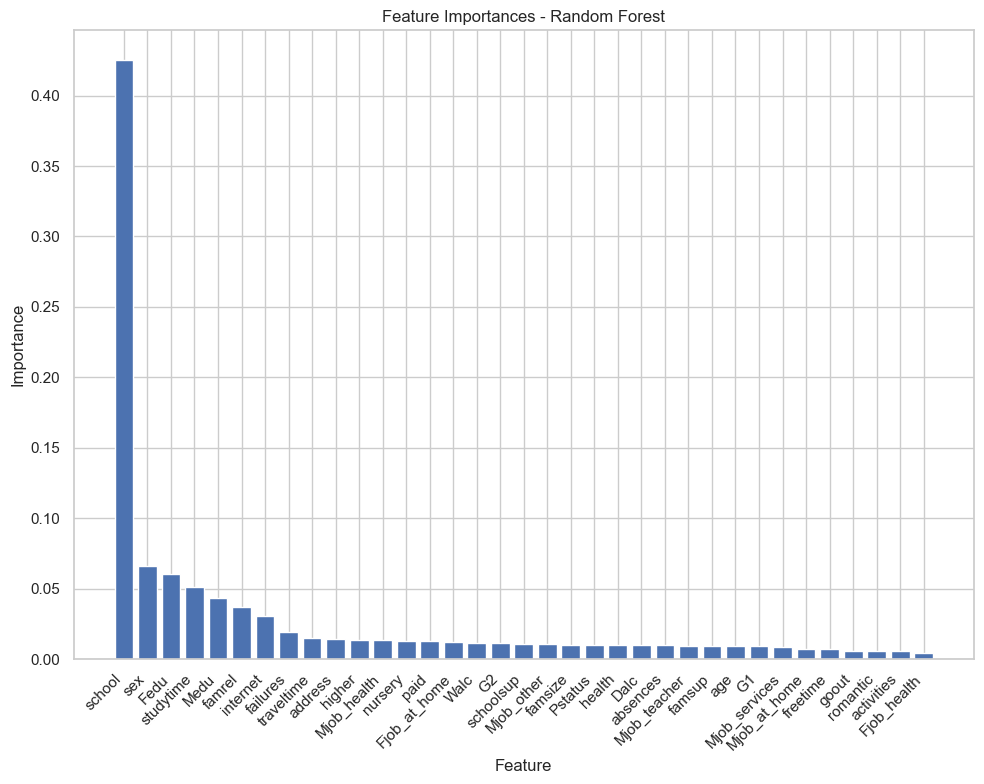

In [76]:
import matplotlib.pyplot as plt

# Funzione per visualizzare l'importanza delle feature dopo PCA
def plot_feature_importances(model, feature_names, col_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        title = f"Feature Importances - {model_name}"
        
        plt.figure(figsize=(10, 8))
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), [col_names[i] for i in indices], rotation=45, ha='right')
        plt.title(title)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.tight_layout()  # Opzionale: migliora la disposizione delle labels
        plt.show()
    else:
        print(f"Model {model_name} does not provide feature importances.")

# Esegui la visualizzazione delle feature importanti per il modello Random Forest
plot_feature_importances(random_search_rf.best_estimator_, feature_names, col_names, 'Random Forest')


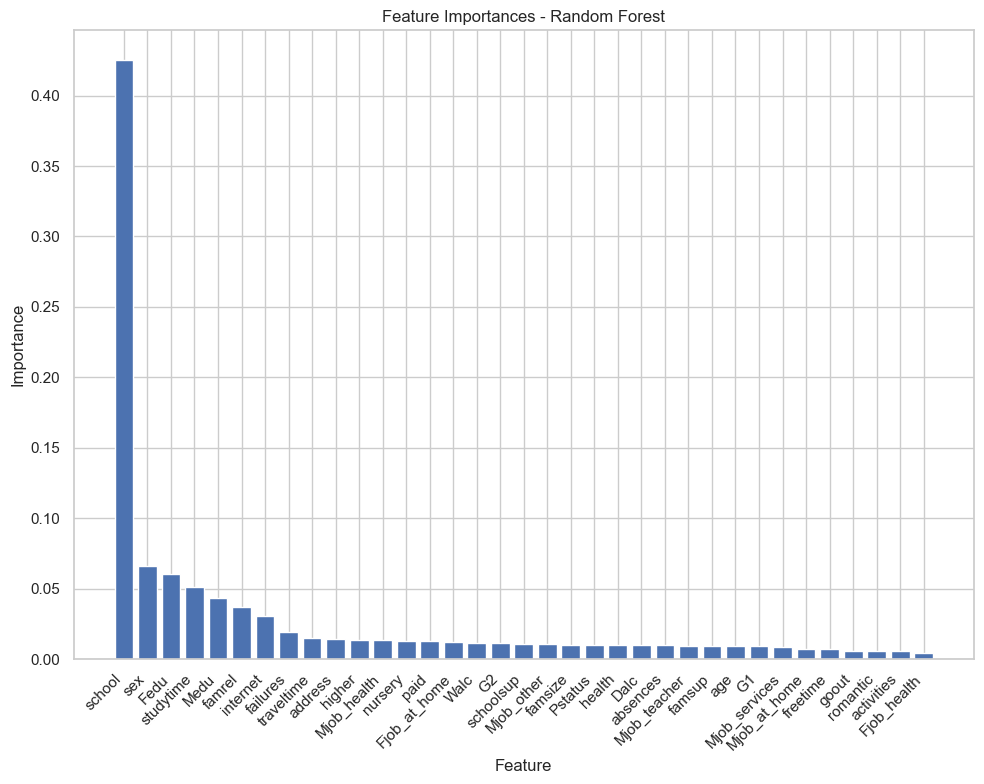

SVR model does not provide feature importances.


IndexError: index 25 is out of bounds for axis 0 with size 17

<Figure size 1000x800 with 0 Axes>

In [77]:
import matplotlib.pyplot as plt

# Funzione per visualizzare l'importanza delle feature per diversi tipi di modelli
def plot_feature_importances(model, feature_names, col_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        title = f"Feature Importances - {model_name}"
        
        plt.figure(figsize=(10, 8))
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), [col_names[i] for i in indices], rotation=45, ha='right')
        plt.title(title)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.tight_layout()  # Opzionale: migliora la disposizione delle labels
        plt.show()
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
        indices = np.argsort(importances)[::-1]
        title = f"Feature Importances (absolute values) - {model_name}"
        
        plt.figure(figsize=(10, 8))
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), [col_names[i] for i in indices], rotation=45, ha='right')
        plt.title(title)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.tight_layout()  # Opzionale: migliora la disposizione delle labels
        plt.show()
    else:
        print(f"Model {model_name} does not provide feature importances.")

# Esegui la visualizzazione delle feature importanti per ogni modello

# Random Forest
plot_feature_importances(random_search_rf.best_estimator_, feature_names, col_names, 'Random Forest')

# SVR - se SVR fornisce i coefficienti delle feature
if hasattr(random_search_svr.best_estimator_, 'coef_'):
    plot_feature_importances(random_search_svr.best_estimator_, feature_names, col_names, 'SVR')
else:
    print("SVR model does not provide feature importances.")

# KNN - KNN non fornisce feature importances, quindi può essere escluso da questo tipo di visualizzazione

# Logistic Regression - se Logistic Regression fornisce i coefficienti delle feature
if hasattr(random_search_lr.best_estimator_, 'coef_'):
    plot_feature_importances(random_search_lr.best_estimator_, feature_names, col_names, 'Logistic Regression')
else:
    print("Logistic Regression model does not provide feature importances.")


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (45,) and arg 1 with shape (35,).

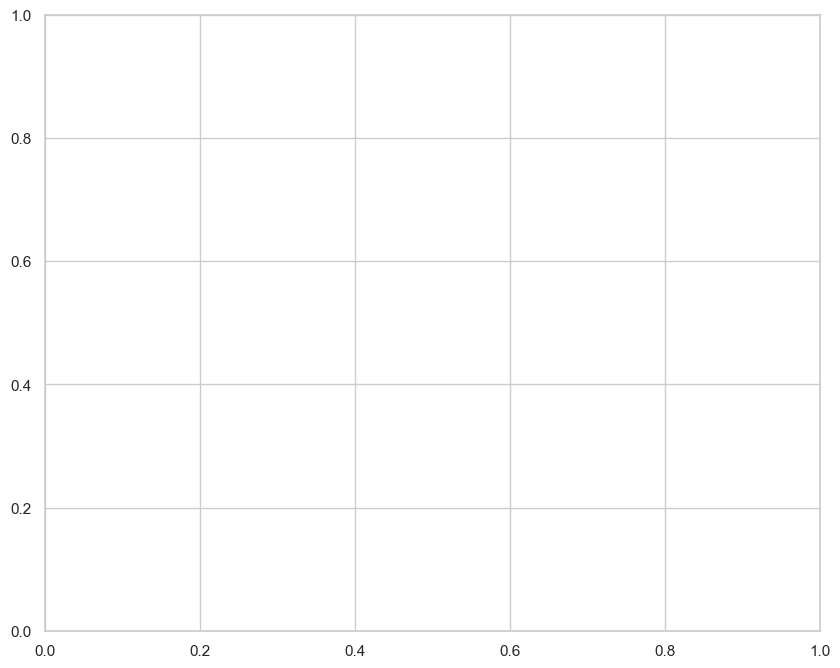

In [47]:
# Visualizzazione dell'importanza delle feature

import matplotlib.pyplot as plt

# Funzione per ottenere le feature importanti da un modello
def plot_feature_importances(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        title = f"Feature Importances - {model_name}"
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
        indices = np.argsort(importances)[::-1]
        title = f"Feature Importances (absolute values) - {model_name}"
    else:
        print(f"Model {model_name} does not provide feature importances.")
        return
    
    plt.figure(figsize=(10, 8))
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

# Eseguire la visualizzazione delle feature importanti per ogni modello

# Random Forest
plot_feature_importances(random_search_rf.best_estimator_, X.columns, 'Random Forest')

# SVR - se SVR fornisce i coefficienti delle feature
if hasattr(random_search_svr.best_estimator_, 'coef_'):
    plot_feature_importances(random_search_svr.best_estimator_, X.columns, 'SVR')
else:
    print("SVR model does not provide feature importances.")

# KNN - KNN non fornisce feature importances, quindi può essere escluso da questo tipo di visualizzazione

# Logistic Regression - se Logistic Regression fornisce i coefficienti delle feature
if hasattr(random_search_lr.best_estimator_, 'coef_'):
    plot_feature_importances(random_search_lr.best_estimator_, X.columns, 'Logistic Regression')
else:
    print("Logistic Regression model does not provide feature importances.")


In [44]:
# Visualizzazione dell'importanza delle feature

import matplotlib.pyplot as plt

# Importanza delle feature per Random Forest
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X_pca.shape[1]), importances[indices], align="center")
plt.xticks(range(X_pca.shape[1]), indices)
plt.xlim([-1, X_pca.shape[1]])
plt.show()


NameError: name 'grid_rf' is not defined